# Prostate Data  

This demonstration solves a regular, unconstrained lasso problem using
the constrained lasso solution path (`lsq_classopath.jl`).

The `prostate` data come from a study that examined the correlation between the level of prostate specific antigen and a number of clinical measures in men who were about to receive a radical prostatectomy. ([Stamey et al. (1989)](../references.md#4))

Let's load and organize the `prostate` data. Since we are interested in the following variables as predictors, we extract them and create a design matrix `Xz`:

* `lcavol` : log(cancer volume)
* `lweight`: log(prostate weight)
* `age`    : age
* `lbph`   : log(benign prostatic hyperplasia amount)
* `svi`    : seminal vesicle invasion
* `lcp`    : log(capsular penetration)
* `gleason`: Gleason score
* `pgg45`  : percentage Gleason scores 4 or 5

The response variable is `lpsa`, which is log(prostate specific antigen). 

In [1]:
using ConstrainedLasso 
prostate = readcsv("misc/prostate.csv", header=true)
tmp = []
labels = ["lcavol" "lweight" "age" "lbph" "svi" "lcp" "gleason" "pgg45"]
for i in labels
    push!(tmp, find(x -> x == i, prostate[2])[1])
end
Xz = Array{Float64}(prostate[1][:, tmp])

97×8 Array{Float64,2}:
 -0.579818  2.76946  50.0  -1.38629   0.0  -1.38629   6.0   0.0
 -0.994252  3.31963  58.0  -1.38629   0.0  -1.38629   6.0   0.0
 -0.510826  2.69124  74.0  -1.38629   0.0  -1.38629   7.0  20.0
 -1.20397   3.28279  58.0  -1.38629   0.0  -1.38629   6.0   0.0
  0.751416  3.43237  62.0  -1.38629   0.0  -1.38629   6.0   0.0
 -1.04982   3.22883  50.0  -1.38629   0.0  -1.38629   6.0   0.0
  0.737164  3.47352  64.0   0.615186  0.0  -1.38629   6.0   0.0
  0.693147  3.53951  58.0   1.53687   0.0  -1.38629   6.0   0.0
 -0.776529  3.53951  47.0  -1.38629   0.0  -1.38629   6.0   0.0
  0.223144  3.24454  63.0  -1.38629   0.0  -1.38629   6.0   0.0
  0.254642  3.60414  65.0  -1.38629   0.0  -1.38629   6.0   0.0
 -1.34707   3.59868  63.0   1.26695   0.0  -1.38629   6.0   0.0
  1.61343   3.02286  63.0  -1.38629   0.0  -0.597837  7.0  30.0
  ⋮                                         ⋮                  
  3.30285   3.51898  64.0  -1.38629   1.0   2.32728   7.0  60.0
  2.02419   3.731

In [2]:
y = Array{Float64}(prostate[1][:, end-1])

97-element Array{Float64,1}:
 -0.430783
 -0.162519
 -0.162519
 -0.162519
  0.371564
  0.765468
  0.765468
  0.854415
  1.04732 
  1.04732 
  1.26695 
  1.26695 
  1.26695 
  ⋮       
  3.63099 
  3.68009 
  3.71235 
  3.98434 
  3.9936  
  4.02981 
  4.12955 
  4.38515 
  4.68444 
  5.14312 
  5.47751 
  5.58293 

First we standardize the data by subtracting its mean and dividing by its standard deviation. 

In [3]:
n, p = size(Xz)
for i in 1:size(Xz,2)
    Xz[:, i] -= mean(Xz[:, i])
    Xz[:, i] /= std(Xz[:, i])
end
Xz

97×8 Array{Float64,2}:
 -1.63736   -2.00621    -1.86243    …  -0.863171  -1.04216   -0.864467
 -1.98898   -0.722009   -0.787896      -0.863171  -1.04216   -0.864467
 -1.57882   -2.18878     1.36116       -0.863171   0.342627  -0.155348
 -2.16692   -0.807994   -0.787896      -0.863171  -1.04216   -0.864467
 -0.507874  -0.458834   -0.250631      -0.863171  -1.04216   -0.864467
 -2.03613   -0.933955   -1.86243    …  -0.863171  -1.04216   -0.864467
 -0.519967  -0.362793    0.0180011     -0.863171  -1.04216   -0.864467
 -0.557313  -0.208757   -0.787896      -0.863171  -1.04216   -0.864467
 -1.80425   -0.208757   -2.26537       -0.863171  -1.04216   -0.864467
 -0.956085  -0.897266   -0.116315      -0.863171  -1.04216   -0.864467
 -0.92936   -0.0578992   0.152317   …  -0.863171  -1.04216   -0.864467
 -2.28833   -0.0706369  -0.116315      -0.863171  -1.04216   -0.864467
  0.223498  -1.41472    -0.116315      -0.299282   0.342627   0.199211
  ⋮                                 ⋱   ⋮             

Now we solve the problem using solution path algorithm. 

In [ ]:
βpath, ρpath, = lsq_classopath(Xz, y);

In [5]:
βpath

8×9 Array{Float64,2}:
 0.0  0.421131  0.461588   0.557453  …   0.597269    0.602923    0.665147 
 0.0  0.0       0.0        0.171805      0.232686    0.246293    0.26648  
 0.0  0.0       0.0        0.0          -0.0598626  -0.0937415  -0.158195 
 0.0  0.0       0.0        0.0           0.088065    0.108124    0.140311 
 0.0  0.0       0.0404563  0.182941      0.2436      0.252692    0.315329 
 0.0  0.0       0.0        0.0       …   0.0         0.0        -0.148286 
 0.0  0.0       0.0        0.0           0.0         0.0123116   0.0355492
 0.0  0.0       0.0        0.0           0.0645835   0.0700037   0.12572  

We plot the solution path below. 

In [6]:
using Plots; pyplot(); 
colors = [:green :orange :black :purple :red :grey :brown :blue] 
plot(ρpath, βpath', xaxis = ("ρ", (minimum(ρpath),
      maximum(ρpath))), yaxis = ("β̂(ρ)"), label=labels, color=colors)
title!("Prostate Data: Solution Path via Constrained Lasso")
savefig("misc/prostate.svg")

  likely near In[6]:68


Below, we solve the same problem using `GLMNet.jl` package. 

In [7]:
using GLMNet;  
path = glmnet(Xz, y, intercept=false);
path.betas


Use "abstract type Loss end" instead.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] #glmnet!#7(::Array{Float64,1}, ::Bool, ::Float64, ::Array{Float64,1}, ::Array{Float64,2}, ::Int64, ::Int64, ::Int64, ::Float64, ::Array{Float64,1}, ::Float64, ::Bool, ::Bool, ::Int64, ::GLMNet.#glmnet!, ::Array{Float64,2}, ::Array{Float64,1}, ::Distributions.Normal{Float64}) at /Users/juhyun-kim/.julia/v0.6/GLMNet/src/GLMNet.jl:236
 [4] (::GLMNet.#kw##glmnet!)(::Array{Any,1}, ::GLMNet.#glmnet!, ::Array{Float64,2}, ::Array{Float64,1}, ::Distributions.Normal{Float64}) at ./<missing>:0
 [5] #glmnet#22(::Array{Any,1}, ::Function, ::Array{Float64,2}, ::Array{Float64,1}, ::Distributions.Normal{Float64}) at /Users/juhyun-kim/.julia/v0.6/GLMNet/src/GLMNet.jl:369
 [6] (::GLMNet.#kw##glmnet)(::Array{Any,1}, ::GLMNet.#glmnet, ::Array{Float64,2}, ::Array{Float64,1}, ::Distributions.Normal{Float64}) at ./<missing>:0 (repea

8×70 GLMNet.CompressedPredictorMatrix:
 0.0  0.075317  0.143943  0.206473  …   0.660413   0.660823   0.661201 
 0.0  0.0       0.0       0.0           0.264962   0.265099   0.265223 
 0.0  0.0       0.0       0.0          -0.153231  -0.153657  -0.154055 
 0.0  0.0       0.0       0.0           0.137859   0.138074   0.138272 
 0.0  0.0       0.0       0.0           0.310435   0.310849   0.311241 
 0.0  0.0       0.0       0.0       …  -0.136715  -0.137682  -0.138598 
 0.0  0.0       0.0       0.0           0.033943   0.034123   0.0342689
 0.0  0.0       0.0       0.0           0.121233   0.121575   0.121916 


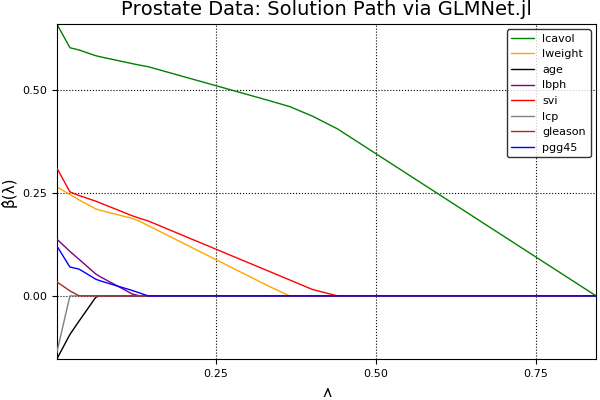

In [10]:
plot(path.lambda, path.betas', color=colors, label=labels, 
		xaxis=("λ"), yaxis= ("β̂(λ)"))
title!("Prostate Data: Solution Path via GLMNet.jl")

In [11]:
savefig("misc/prostate2.svg")